<a href="https://colab.research.google.com/github/fclubb/EarthSurfaceProcesses/blob/master/Week2_HillslopeEvolution/1DHillslope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hillslope Evolution Modelling
In this session you will apply a simple model for how hillslopes develop over time. The model is written in the Python computer programming language, but you don't need any prior knowledge of computer programming. The aims of this practical are:
* Run the numerical model to simulate hillslope evolution
* Understand the concept of steady-state in hillslope morphology
* Explore the controls on how rapidly hillslopes evolve through time
* Create and explain graphs/figures that demonstrate particular controls on hillslope form

### Python
The programming language we are using in this lab is called Python.  No prior knowledge of programming is required for this lab. Learning how to be a programmer is not the aim! However, this sort of scientific computing is becoming more common place in research and consultancy, so it won't do you any harm to see it in action. Python is multifunctional, for example it can interface with ArcGIS to automate workflows.

**To run a code block, click in a cell, hold down shift, and press enter.** An asterisk in square brackets `In [*]:` will appear while the code is being executed, and this will change to a number `[1]:` when the code is finished. *The order in which you execute the code blocks matters, they must be run in sequence.* 

### Working through the practical

To work through this notebook, firstly:
1. **COPY THE NOTEBOOK TO YOUR GOOGLE DRIVE** using the "Copy to Drive" button at the top of the page. 
2. Read through the instructions and execute each code block cell by clicking `Shift and Enter` to see what it does.
3. Do the exercises set out throughout notebook.
4. Save the figures and keep them for the next session.

Inside blocks of python code there are comments indicated by lines that start with `#`. These lines are not computer code but rather comments providing information about what the code is doing to help you follow along. Before we get started we need to tell python which tools we want to use (these are called modules):

In [ ]:
# import modules for numerical calculations and for plotting
import numpy as np
import matplotlib.pyplot as plt

# tell python to allow plotting to occur within the page
%matplotlib inline

# Customise figure style
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
rc('font',size=16)

# Couple of other things for displaying model progress
from ipywidgets import FloatProgress
from IPython.display import display
import os

## Hillslope Sediment Flux

In today's lecture we identified two geomorphic transport laws that describe the downslope volumetric flux rate $q_s$ of hillslope sediment due to slope-dependent processes. The first rule assumes that sediment transport processes combine to make downslope flux linearly proportional to the topographic gradient ($S$) and an efficiency coefficient ($D$):

$$
\begin{equation}
q_s = DS \qquad \textrm{where} \qquad S = {{dz}\over{dx}}
\end{equation}
$$

Note that $z$ denotes elevation at the surface and $x$ distance along the hillslope, so the slope is related to the hillslope angle. 
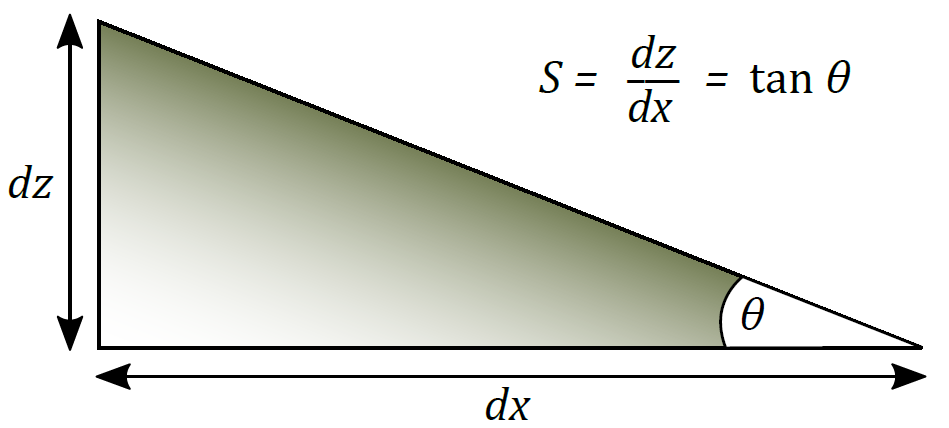

The second sediment transport rule instead states that the downslope flux of sediment is non-linearly proportional to the topographic gradient, such that the flux rate becomes very rapid as $S$ approaches a limiting gradient $S_C$:

$$
\begin{equation}
q_s = {{-D S}\over{1-(S/S_C)^2}}
\end{equation}
$$

You will now do some calculations to investigate how hillslope sediment flux $q_s$ varies as a function of slope $S$ and the diffusivity coefficient $D$. A compilation of reported values of the diffusivity coefficient showed that it varies 0.1-50 m<sup>2</sup>/kyr [(Hurst et al. 2013)](http://onlinelibrary.wiley.com/doi/10.1002/jgrf.20049/full). Values of the critical slope term $S_C$ have been reported to range from 0.8-1.25  [(Grieve et al. 2016)](https://www.earth-surf-dynam.net/4/309/2016/).

First we'll calculate $q_s$ according to the linear diffusion equation, using typical value of $D$, and plot the resulting relationship:

In [ ]:
# define a range of slope values from 0-1 (same as 0-45 degrees) in 0.01 increments 
# over which to evaluate the sediment transport equation
S = np.arange(0.,1.,0.01)

# define the constants
D = 0.001 # m^2/year
S_C = 1. # dimensionless

# evaluate potential sediment flux using the linear sediment transport equation
q_sl = D*S

# set up a figure and set of axes for plotting
fig, ax = plt.subplots()

# make a line plot of slope vs sediment flux (dashed line coloured blue)
ax.plot(S,q_sl,'b--', label='Linear flux law')
plt.xlabel("Slope (m/m)", fontsize=14)
plt.ylabel("Sediment Flux Rate (m$^2$/y)", fontsize=14)
plt.tight_layout()

Next, compare the results of the linear diffusion equation to those of the non-linear diffusion equation by recalculating $q_s$ and adding the results to the plot:

In [ ]:
# set up a figure and set of axes for plotting
fig, ax = plt.subplots()

# plot the linear flux law (same as above)
ax.plot(S,q_sl,'b--', label='Linear flux law')
plt.xlabel("Slope (m/m)", fontsize=14)
plt.ylabel("Sediment Flux Rate (m$^2$/y)", fontsize=14)

# evaluate potential sediment flux using the non-linear sediment transport equation
# note that to do raise a value to a power we use two asterisks
q_sn = D*S/(1-(S/S_C)**2.)

# plot the new result as a solid blue line
ax.plot(S,q_sn,'b-', label='Non-linear flux law')

# because the nonlinear equation results in sediment flux approaching infinity, 
# we will limit the range of data we visualise
ax.set_ylim(0,0.02)
plt.legend(loc='upper left')

Try adjusting the diffusivity coefficient $D$ and see how this influences the downslope rate of sediment transport predicted by both the flux laws:

In [ ]:
# set up a figure and set of axes for plotting
fig, ax = plt.subplots()

# plot the linear flux law as a dashed blue line (same as above)
ax.plot(S,q_sl, color='blue', ls='--', label='Linear flux law, D = {}'.format(D))
# plot the non-linear flux law as a solid blue line
ax.plot(S,q_sn, color='blue', ls='-', label='Non-linear flux law, D = {}'.format(D))
plt.xlabel("Slope (m/m)", fontsize=14)
plt.ylabel("Sediment Flux Rate (m$^2$/y)", fontsize=14)

# Change the transport coefficient
D = 0.005

# recalculate the predicted sediment flux for both flux laws:
new_q_sl = D*S
new_q_sn = D*S/(1-(S/S_C)**2.)

# plot the results in red
ax.plot(S,new_q_sl, color='red', ls='--', label='Linear flux law, D = {}'.format(D))
ax.plot(S,new_q_sn, color='red', ls='-', label='Non-linear flux law, D = {}'.format(D))

# add the legend
plt.legend(loc='upper left')

Don't forget to save the figure...

In [ ]:
fig.savefig("Sediment_Flux_Plot_D.pdf")

Now instead try changing the critical slope gradient $S_C$ and see how this influences the downslope rate of sediment transport predicted by both the flux laws. If you reduce the $S_C$ value to less than 1, but still try to evaluate the nonlinear flux equation at values of $S > S_C$, python will give you a `divide by zero` warning because the bottom of the equation goes to zero. Don't worry about this.

In [ ]:
# set up a figure and set of axes for plotting
fig, ax = plt.subplots()

# plot the linear flux law as a dashed blue line (same as above)
ax.plot(S,q_sl, color='blue', ls='--', label='Linear flux law, $S_c$ = {}'.format(S_C))
# plot the non-linear flux law as a solid blue line
ax.plot(S,q_sn, color='blue', ls='-', label='Non-linear flux law, $S_c$ = {}'.format(S_C))
plt.xlabel("Slope (m/m)", fontsize=14)
plt.ylabel("Sediment Flux Rate (m$^2$/y)", fontsize=14)

# Change the transport coefficient
S_C = 0.8

# recalculate the predicted sediment flux for both flux laws:
new_q_sl = D*S
new_q_sn = D*S/(1-(S/S_C)**2.)

# plot the results in black
ax.plot(S,new_q_sl, color='black', ls='--', label='Linear flux law, $S_c$ = {}'.format(S_C))
ax.plot(S,new_q_sn, color='black', ls='-', label='Non-linear flux law, $S_c$ = {}'.format(S_C))
ax.set_ylim(0,)

# add the legend
plt.legend(loc='upper left')

Don't forget to save this figure...

In [ ]:
fig.savefig("Sediment_Flux_Plot_Sc.pdf")

## Exercise 1
<p>Copy your figures into a Word document and write a figure caption that annotates what each plot is showing. The caption should be a paragraph of text that describes each line, and the parameters that have been used to create them, and offers a brief explanation of how the parameters used influence rates of sediment transport downslope. For an indication of the level of detail required, you could look at examples of captions to figures in journal articles, such as Figure 8 in [Roering (2008)](https://pubs.geoscienceworld.org/gsabulletin/article/120/9-10/1248/2317/how-well-can-hillslope-evolution-models-explain).

## Hillslope evolution model
To model hillslope evolution, the equations for weathering (we covered these last week) and downslope sediment transport (the equations above) need to be implemented numerically.  The image below shows a schematic diagram visualising the model setup that will be used. You will model hillslopes that are bound on either side by a river channel. The river is assumed to be eroding downward at a rate equal to the rate at which the landscape is being uplifted ($E=U$), such that the elevation of the channel does not change through time. The hillslope is split into a series of columns of equal width ($dx$).

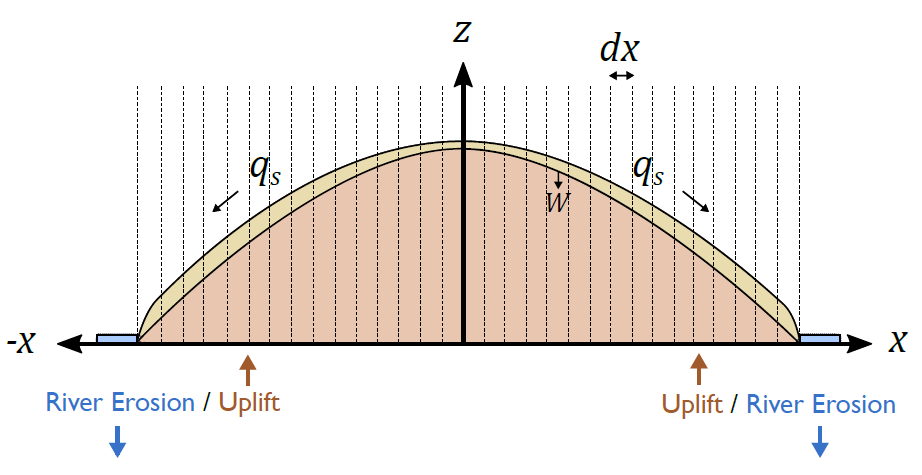

The model will track the uplift of the bedrock/soil interface ($z_b$), carry out weathering ($W$) depending on soil depth ($h$), move soil between columns depending in some way (linear or nonlinear) on the gradient of the hillslope surface ($dz/dx$), and update soil thickness ($h$). The following flow diagram shows the routine. The procedure is repeated a number of times until a prescribed time to stop the model is reached.

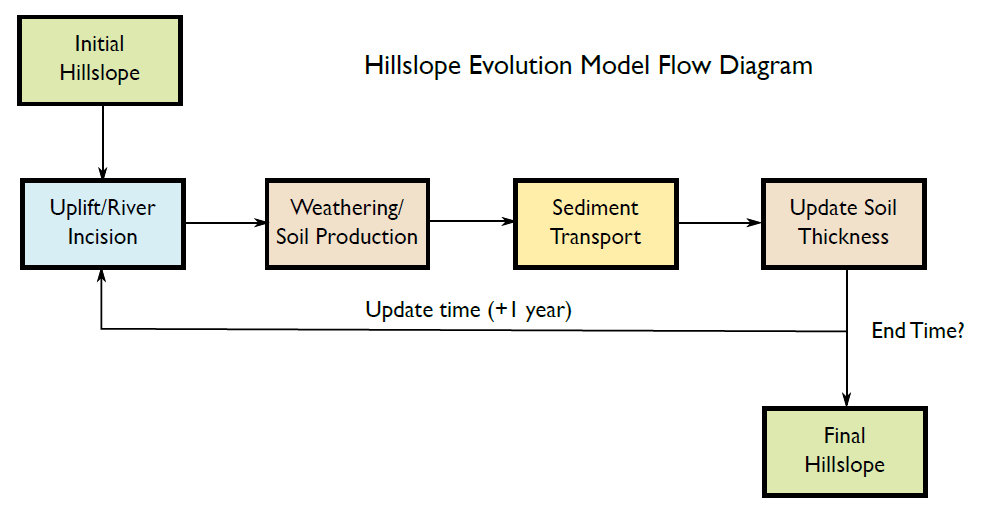

The code below is a class function that ***defines*** the model. This means that we create the model as a set of instruction but doesn't actually execute them or run the model yet. We will ***call*** this class function later once we are ready to run the model. You do not need to spend loads of time fully understanding exactly how the model works, but cast your eyes through it reading the comments to see that the structure reflects the flow diagram above. Then execute the cell containing the model so that it is ***defined***.

In [ ]:
# The main model goes here as a python class
class Hillslope1D:
    
    """ 
    A simple 1D-hillslope evolution model for teaching purposes
    
    Martin D. Hurst
    University of Glasgow
    September 2017
        
    """
    
    # setup an initialisation function
    # This defines the default variables and parameters for the model
    def __init__(self):
        
        # default spatial domain
        self.dx = (1.)     # column spacing (metres)
        self.Lh = 50.      # hillslope length (m)
        
        # default boundary conditions
        self.E1 = 0.0001    # erosion rate at left boundary (metres/year)
        self.E2 = 0.0001    # erosion rate at right boundary (m/y)
        
        # default geomorphic constants
        self.FluxType = "LinearDiffusion" # default stype of sediment flux
        self.D = 0.01      # diffusivity coefficient (m^2/y)
        self.Sc = 1.       # critical slope gradient (m/m)
        self.W_0 = 0.001  # maximum weathering rate (m/y)
        self.k = 1.       # weathering scaling parameter
        self.rho_r = 2650. # density of bedrock (kilograms/metre^3)
        self.rho_s = 1400. # density of soil (kg/m^3)
        
        # setup the time control
        self.Time = 0.          # we will start at time 0 (years)
        self.dt = 10.           # time step (y)
        self.EndTime = 500000.  # time the model will stop (y)
        
        # setup plotting control
        self.PlotFigures = True
        self.PlotTime = 0.
        self.PlotInterval = 10000.
        
        # setup the initial model domain (this is defunct as its done at the start of a run anyway)
        self.x = np.arange(-self.Lh,self.Lh+self.dx,self.dx)
        self.zb = np.zeros(len(self.x))
        self.h = np.zeros(len(self.x))
        self.z = np.zeros(len(self.x))
    
    # this function runs the model
    def RunModel(self):
        
        # setup the initial model domain
        self.x = np.arange(-self.Lh,self.Lh+self.dx,self.dx)
        self.zb = np.zeros(len(self.x))
        self.h = np.zeros(len(self.x))
        self.z = np.zeros(len(self.x))
        
        # set up a figure for plotting the results
        fig, ax = plt.subplots()
        
        # Create a progress bar to show the model is working
        f = FloatProgress(min=self.Time,max=self.EndTime)
        display(f)
        
        # Track model relief through time, need an empty list to update
        Relief = []
        MeanSoilDepth = []

        # loop through time and update hillslope morphology
        while self.Time <= self.EndTime:
    
            # update time
            self.Time += self.dt

            # Do uplift for the entire model domain
            # note that we have to multiply the uplift rate by the length of our time step
            # the longer the timestep the more uplift will have taken place
            # this is the same for all of our rate calculation (e.g. soil production, sediment transport)
            # the sign "+=" means to add it on to itself so X += 1 is the same as X = X + 1
            self.zb += np.max([self.E1,self.E2])*self.dt

            # Now erode the rivers at the model boundaries
            # We can pass the instructions an index in square brackets to specify a particular 
            # place in the model. [0] refers to the first column (on the left) [-1] refers to
            # the last column (on the right), which is where the rivers are.
            self.zb[0] -= self.E1*self.dt
            self.zb[-1] -= self.E2*self.dt

            # Do the weathering with the soil production equation
            # note we have to multiply by the amount of time passing again 
            # update the soil/bedrock boundary and soil thickness accordingly
            # we dont bother doing this in the rivers as they've already eroded
            # so just do it over the indexes [1:-1] to skip out the first and last columns
            W = (self.rho_r/self.rho_s)*self.W_0*np.exp(-self.k*self.h)*self.dt
            self.zb[1:-1] -= W[1:-1]
            self.h[1:-1] += W[1:-1]

            # Calculate the topographic slope between each of the hillslope boxes
            # this will be positive on the left side and negative on the right
            Slope = np.diff(self.z)/self.dx

            # Check that the hillslopes haven't gotten too steep
            # this will probably break the model if it happens
            if np.any(Slope>self.Sc) and self.FluxType == "NonlinearDiffusion":
                Slope[Slope>self.Sc] = 0.99*self.Sc

            # Calculate the fluxes across the right hand boundary of each column
            # for either linear or nonlinear flux laws
            # note we have to multiply by the amount of time passing again 
            if self.FluxType == "LinearDiffusion":
                Qs_out = -self.D*Slope*self.dt
            elif self.FluxType == "NonlinearDiffusion":
                Qs_out = -self.dt*self.D*Slope/(1-(Slope/self.Sc)**2.)

            # Add flux for the last element as a copy of previous element
            # to make sure the array is the same size as the model domain
            Qs_out = np.append(Qs_out,Qs_out[-1])

            # Get fluxes in as one column to the left from fluxes out
            Qs_in = np.roll(Qs_out,1)

            # Update soil thickness
            # keep boundaries the same (rivers evacuate all sediment)
            self.h[1:-1] += (Qs_in[1:-1] - Qs_out[1:-1])
            
            # update surface elevations
            self.z = self.zb + self.h
            
            # Check that there is not negative soil depth and negative weathering depth
            if np.any(self.h<0):
                self.h[self.h<0] = 0
            
            if np.any(self.zb<0):
                self.zb[self.zb<0] = 0
                
            # Plot hillslope morphology periodically
            # depending the plotting interval specified
            if self.Time >= self.PlotTime:
                
                # Calculate relief
                Relief.append(np.ptp(self.z))
                MeanSoilDepth.append(np.mean(self.h))
            
                # plot the hillslope surface profile
                ax.plot(self.x,self.z,'k-',lw=1.)

                # plot the streams
                ax.plot([self.x[0],self.x[-1]],[self.zb[0],self.zb[-1]],'bo',zorder=10)

                # plot the topographic divide
                Divide=np.argmin(np.abs(Slope))
                ax.plot(self.x[Divide],self.z[Divide],'ro',zorder=8)

                # label the model runs
                #ax.text(x[-1]+5,z[-1],str(np.int(self.Time/1000.))+" ky")
                self.PlotTime += self.PlotInterval
        
                # update progress bar
                f.value = self.Time

        # Decorate the figure
        ax.set_xlim(-self.Lh-0.1*self.Lh,self.Lh+0.1*self.Lh)
        plt.xticks(np.arange(-self.Lh,self.Lh+self.dx,20.))
        plt.xlabel('Distance (m)')
        plt.ylabel('Elevation (m)')
        plt.tight_layout()
        
        #check whether to display figures
        if self.PlotFigures:
            fig
            fig.savefig("Fig1.pdf")
        
        # Plot the final hillslope
        fig2 = plt.figure()
        ax2 = plt.subplot(111)
        # plot the surface and bedrock elevations
        ax2.plot(self.x,self.z,'k-')
        ax2.plot(self.x,self.zb,'k-')
        # plot the streams
        ax2.plot([self.x[0],self.x[-1]],[self.zb[0],self.zb[-1]],'bo',ms=10,zorder=10)
        # do some colouring in
        ax2.fill(np.concatenate((self.x,self.x[::-1])),np.concatenate((self.z,self.zb[::-1])),color=[1.,0.98,0.7])
        ax2.fill(np.concatenate((self.x,self.x[::-1])),np.concatenate((np.zeros(len(self.x)),self.zb[::-1])),color=[0.9,0.8,0.7])
        plt.xlabel('Distance (m)')
        plt.ylabel('Elevation (m)')
        plt.ylim(0,np.max(self.z)+1)
        ax2.set_xlim(-self.Lh-0.1*self.Lh,self.Lh+0.1*self.Lh)
        plt.xticks(np.arange(-self.Lh,self.Lh+self.dx,20.))
        plt.tight_layout()
        
        #check whether to display figures
        if self.PlotFigures:
            fig2
            fig.savefig("Fig2.pdf")
        
        # Plot relief through time
        fig3 = plt.figure()
        ax3 = plt.subplot(111)
        Time = np.arange(0,self.EndTime+1,self.PlotInterval)/1000.
        plt.plot(Time,Relief,'ko-')
        plt.xlabel("Time (kyrs)")
        plt.ylabel("Hillslope Relief (m)")
        ax4 = plt.twinx()
        plt.plot(Time,MeanSoilDepth,'go-')
        # color code the axis
        plt.ylabel("Mean Soil Depth (m)",color='g')
        ax4.spines['right'].set_color('g')
        ax4.yaxis.label.set_color('g')
        ax4.tick_params(axis='y', colors='g')
        plt.tight_layout()
        
        #check whether to display figures
        if self.PlotFigures:
            fig3
            fig.savefig("Fig3.pdf")

### Run the model with default parameters
The code below will create an instance of the model which will automatically set itself up with the default parameters according to the code above. The default parameters are:

Parameter|$dx$|$L_H$|$E_1$|$E_2$|$k$|$D$|$S_C$|$W_O$|$\rho_r$|$\rho_s$|$dt$|$t_{max}$|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
Value|1 m|50 m|0.0001 m/y|0.0001 m/y|1|0.01 m$^2$/y|1.0 m/m|0.001 m/y|2650 kg/m$^3$|1400 kg/m$^3$|10 y|500000 years

Let's start by running the model with the default parameters and looking at the output generated. Three plots will be output: 
1. A plot of the hillslope morphology evolving through time
2. A shaded plot of the final hillslope
3. A time-series plot of hillslope relief
By default, the results are plotted every 10,000 years.

In [ ]:
# Create a hillslope model and run
MyHillslope = Hillslope1D()
MyHillslope.RunModel()

Note that these figures get saved automatically as **Fig1.pdf**, **Fig2.pdf** and **Fig3.pdf**. You will need to move/rename them to stop them getting overwritten by subsequent model runs. This can be done in Windows manually or can be done with Python using the operating system (**os**) commands:

In [ ]:
os.rename("Fig1.pdf","Default_Hillslope_Fig1.pdf")
os.rename("Fig2.pdf","Default_Hillslope_Fig2.pdf")
os.rename("Fig3.pdf","Default_Hillslope_Fig3.pdf")

## Exercise 2
Write a short paragraph describing the morphological evolution of the hillslope evolving from an initially flat surface in response to channel incision. You should choose **one** figure to include that you refer to in the text to help articulate your observations.

### Nonlinear Diffusion
One of the useful things about these sorts of numerical models is that it allows us to quickly explore or isolate the different factors that influence hillslope development. The default model simulation used a linear flux law for relatively low erosion rates in the channels. At lower erosion rates, the nonlinear diffusion equation predicts sediment transport rates similar to the linear diffusion equation. Instead we need to explore the influence of non-linear diffusion on hillslope morphology at *high erosion rates* to show how the two models differ. Let's rerun the model but first modify the erosion rates in the streams:

In [ ]:
# Create a hillslope model and run
LinearHillslope = Hillslope1D()

# increase rates of river incision for both streams
LinearHillslope.E1 = 0.001 #m/y
LinearHillslope.E2 = 0.001 #m/y

# run the model
LinearHillslope.RunModel()

You should rename the output figure files as before so that they get saved. Now let's try the same experiment but with **Nonlinear Diffusion**, which requires you to also change the model timestep to $dt$ = *1 year* (Nonlinear equations can suffer from numerical instability and so changing $dt$ is a quick fix for that in a simple model like this one). This will result in the model taking quite a lot longer to run. Save the new figures for nonlinear diffusion.

In [ ]:
# Create a hillslope model and run
NonlinearHillslope = Hillslope1D()

# increase rates of river incision for both streams
NonlinearHillslope.E1 = 0.001 #m/y
NonlinearHillslope.E2 = 0.001 #m/y

# Change the diffusion type to be nonlinear
NonlinearHillslope.FluxType = "NonlinearDiffusion"
NonlinearHillslope.dt = 1.

# run the model
NonlinearHillslope.RunModel()

It would be useful to directly compare the final hillslope morphology for the diffusion and nonlinear diffusion model runs that we have completed already. The next block of code will make a different figure to compare the two:

In [ ]:
# Create a hillslope model and run
fig, ax = plt.subplots()
ax.plot(LinearHillslope.x,LinearHillslope.z, color='black', ls='--', label="Linear")
ax.plot(NonlinearHillslope.x,NonlinearHillslope.z, color='black', ls='-', label="Nonlinear")
plt.legend(loc=1)
plt.xlabel('Distance (m)')
plt.ylabel('Elevation (m)')
plt.tight_layout()
plt.savefig("Linear_nonlinear.pdf")

## Exercise 3
Write a short paragraph describing the morphological evolution of a hillslope evolving according to the nonlinear sediment flux law. Compare the results with those of the linear flux law. You should choose **one** figure to include that you refer to in the text to help articulate your observations.

## Changing the boundary conditions

So far we have been assuming that the two channels are in topographic steady-state (incising to balance against uplift). What do you think might happen to a hillslope if the channels were eroding at different rates. Spend a couple of minutes thinking about this make a rough sketch on some scrap paper of how you might expect distance vs elevation to evolve. This will be your hypothesis to test with the model.

We will set the model up with the default parameters but double the erosion rate at the left hand boundary ($E_1$).

In [ ]:
# Create a hillslope model and run
MyHillslope = Hillslope1D()

# increase rates of river incision for the left stream
MyHillslope.E1 *= 2. # double the erosion rate

# Run the model
MyHillslope.RunModel()

## Exercise 4
Write a short paragraph describing the morphological evolution of a hillslope evolving in response to differing erosion rates at its lower boundaries. In your answer you should consider what the implications might be for the right hand stream if these conditions were to persist for another 500 ky. Choose **one** figure to include that you refer to in the text to help articulate your observations.

## Exploring the Influence of Different Parameters
Even in this relatively simple model there are a variety of processes being simulated and different parameters controlling how the model behaves. Holding everything constant but changing one of the default parameters will allow you to investigate how hillslopes respond to particular conditions.

### Exercise 5
Choose your own parameter/condition to investigate to see how it influences hillslope morphology or hillslope behaviour (there are some suggestions below). Run the model as before but with your changes implemented. Examine the resulting figures carefully and compare to the default simulations to identify how the hillslopes are distinct or similar. It may be necessary to create a new figure to allow direct comparisons (like you did for linear vs nonlinear hillslopes for Exercise 3.

Write a short paragraph describing your modelling results and what they might mean for hillslope evolution. Some things to consider in your answer might be:
<ul>
<li>how hillslope morphology, relief and soil thickness develops</li>
<li>whether the hillslope attains a steady-state and if so how fast</li>
<li>the final hillslope morphology, relief, soil thickness</li>
<li>how these factors compare to the default model setup</li>
</ul>

Choose **one** figure to include that you refer to in the text to help articulate your observations.</p>

<div class="alert alert-warning">
<b>WARNING</b> The model is quite sensitive and <b>WILL</b> behave strangely if you change the parameters too wildly. I am happy to discuss with you what appropriate values for different tests might be and help you set them up.
</div>

Some suggestions for things to test (you only need do one of these, or try a different question of your own):
* What is the infuence of a reducing channel erosion rates for a developed hillslope?
* Do hillslope response times (time to steady-state) depend on hillslope length?
* How does changing the diffusivity coefficient influence hillslope development?
* Do soil production rates exert a strong influence on hillslope morphology?

In [ ]:
# Create a hillslope model and run
MyHillslope = Hillslope1D()

# change parameters here, these currently match the defaults
NonlinearHillslope.E1 = 0.0001 # erosion rate at left boundary (metres/year)
NonlinearHillslope.E2 = 0.0001 # erosion rate at right boundary (m/y)
MyHillslope.Lh = 50.   # Hillslope length (m)
MyHillslope.D = 0.01   # diffusivity coefficient (m^2/y)
MyHillslope.Sc = 1.    # critical slope gradient (m/m)
MyHillslope.W_0 = 0.001  # maximum weathering rate (m/y)        

# Run the model
MyHillslope.RunModel()